check duplicate values 


In [2]:
# check duplicate value
df.duplicated().sum()




# drop duplicate value
df=df.drop_duplicates(inplace=True)

check null value and imputation

In [3]:
# null value check
df.isnull().sum()


# drop null value
df=df.dropna(inplace=True)




# Imputation for Numerical columns
from sklearn.impute import SimpleImputer
num_imputer = SimpleImputer(strategy='mean')
df[['age', 'income', 'purchased']] = num_imputer.fit_transform(df[['age', 'income', 'purchased']])




# KNN Imputer for numerical columns
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=2)
df_imputed = imputer.fit_transform(df) 
df_imputed = pd.DataFrame(df_imputed, columns=df.columns)






# Imputation for Categorical columns
from sklearn.impute import SimpleImputer
cat_imputer = SimpleImputer(strategy='most_frequent')
df[['gender', 'city', 'membership']] = cat_imputer.fit_transform(df[['gender', 'city', 'membership']])




AttributeError: 'NoneType' object has no attribute 'isnull'

box plot

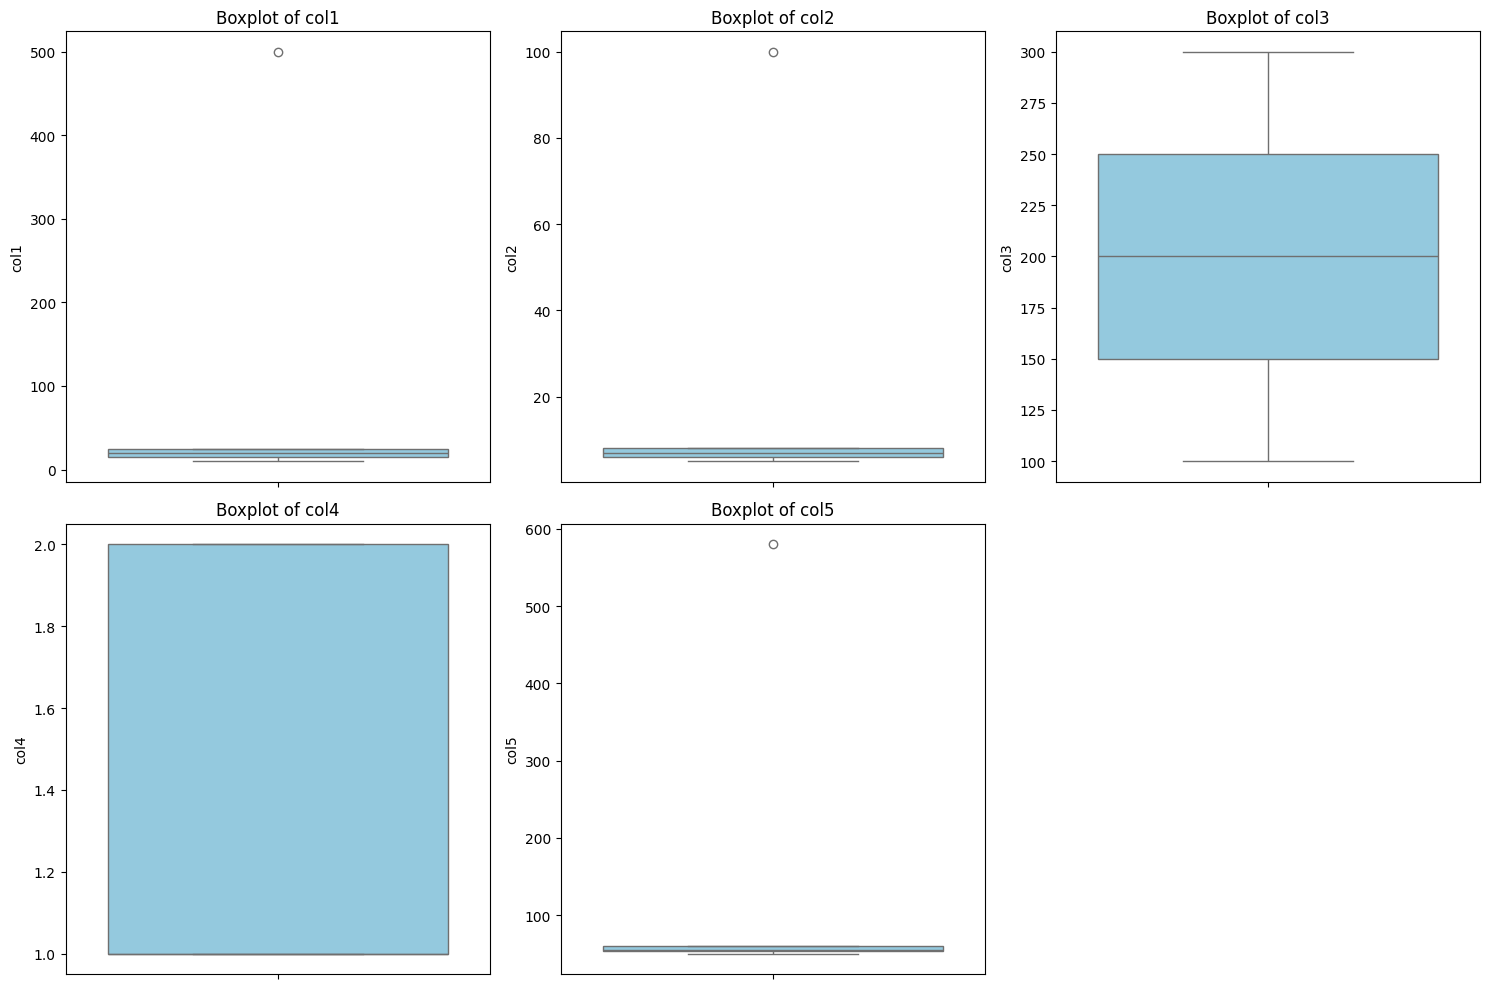

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.DataFrame({
    'col1': [10, 20, 15, 500, 25],   # outlier 500
    'col2': [5, 8, 7, 6, 100],       # outlier 100
    'col3': [100, 200, 150, 300, 250], # OK
    'col4': [1, 2, 1, 2, 1],          # OK
    'col5': [50, 55, 53, 580, 60]    # outlier 580
})

# Set up the plot
plt.figure(figsize=(15, 10))

# Loop through each column
for idx, column in enumerate(df.columns, 1):
    plt.subplot(2, 3, idx)  # (rows, columns, plot number)
    sns.boxplot(y=df[column], color='skyblue')
    plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()


Outlier capping

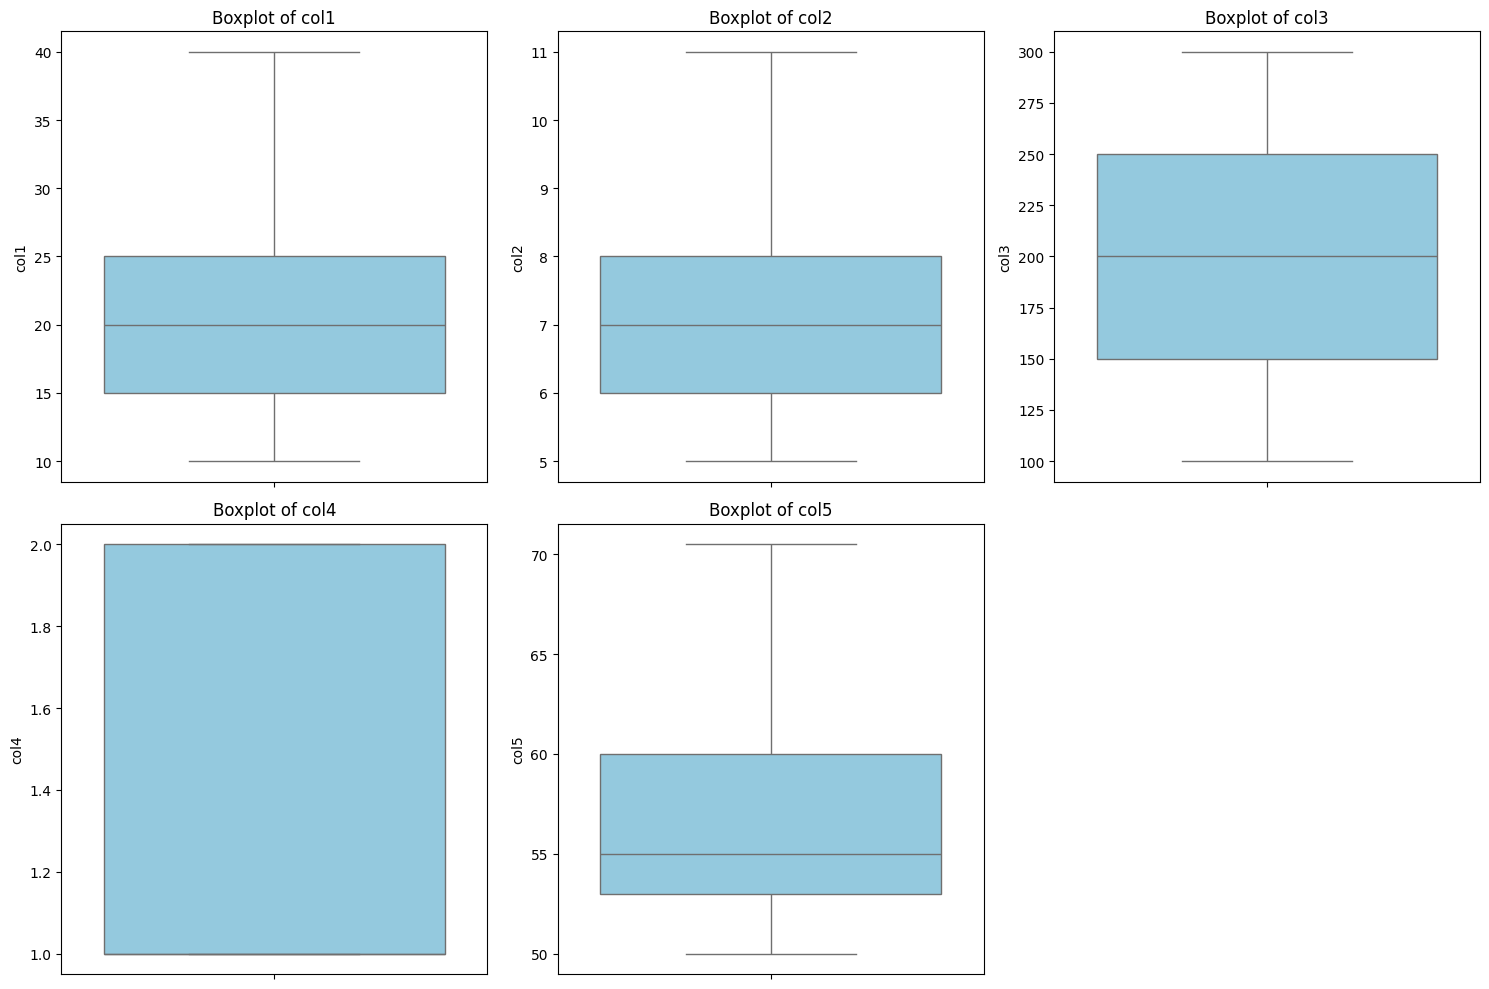

In [ ]:
# List of columns you want to cap
columns_to_cap = ['col1', 'col2', 'col5']

# Function to cap outliers
def cap_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    
    # Cap the values
    df[col] = df[col].apply(lambda x: lower_limit if x < lower_limit else upper_limit if x > upper_limit else x)

# Apply capping to each selected column
for col in columns_to_cap:
    cap_outliers(df, col)


Encoding converts each category into unique integer

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['category'] = le.fit_transform(df['category'])


standard scaler should be performed before training model


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


checking skewness

In [ ]:
# Calculate skewness
skewness = df.skew()
print(skewness)

removing skewness

In [ ]:
from sklearn.preprocessing import PowerTransformer
import seaborn as sns
import matplotlib.pyplot as plt

# Yeo-Johnson Transformation
scaler = PowerTransformer(method='yeo-johnson')
df['feature_yeo'] = scaler.fit_transform(df[['feature']])


# ploting histogram for feature having high skewness
columns_to_plot = ['feature1', 'feature2']

# Plot histograms
plt.figure(figsize=(12, 5))

# Loop through each column
for i, col in enumerate(columns_to_plot, 1):
    plt.subplot(1, 2, i)
    sns.histplot(df[col], kde=True)
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)

plt.tight_layout()
plt.show()


regression model 

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# 1. Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
print("\n------ Linear Regression ------")
print(f"R2 Score : {r2_score(y_test, y_pred_lr):.4f}")
print(f"RMSE     : {np.sqrt(mean_squared_error(y_test, y_pred_lr)):.4f}")

# 2. Ridge Regression
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)
print("\n------ Ridge Regression ------")
print(f"R2 Score : {r2_score(y_test, y_pred_ridge):.4f}")
print(f"RMSE     : {np.sqrt(mean_squared_error(y_test, y_pred_ridge)):.4f}")

# 3. Lasso Regression
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score
lasso_model = Lasso(alpha=0.01)
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)
print("\n------ Lasso Regression ------")
print(f"R2 Score : {r2_score(y_test, y_pred_lasso):.4f}")
print(f"RMSE     : {np.sqrt(mean_squared_error(y_test, y_pred_lasso)):.4f}")

# 4. Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
print("\n------ Decision Tree ------")
print(f"R2 Score : {r2_score(y_test, y_pred_dt):.4f}")
print(f"RMSE     : {np.sqrt(mean_squared_error(y_test, y_pred_dt)):.4f}")

# 5. Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print("\n------ Random Forest ------")
print(f"R2 Score : {r2_score(y_test, y_pred_rf):.4f}")
print(f"RMSE     : {np.sqrt(mean_squared_error(y_test, y_pred_rf)):.4f}")

# 6. Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)
print("\n------ Gradient Boosting ------")
print(f"R2 Score : {r2_score(y_test, y_pred_gb):.4f}")
print(f"RMSE     : {np.sqrt(mean_squared_error(y_test, y_pred_gb)):.4f}")

# 7. XGBoost Regressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
xgb_model = XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
print("\n------ XGBoost ------")
print(f"R2 Score : {r2_score(y_test, y_pred_xgb):.4f}")
print(f"RMSE     : {np.sqrt(mean_squared_error(y_test, y_pred_xgb)):.4f}")

# SGDRegressor (gradient descent)
from sklearn.linear_model import SGDRegressor
model = SGDRegressor(max_iter=1000, learning_rate='constant', eta0=0.01)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Model Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("R^2 Score:", model.score(X_test, y_test))


classification model

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
log_reg = LogisticRegression(max_iter=200)
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)
print(f"Logistic Regression Accuracy: {accuracy_score(y_test, y_pred_log_reg):.4f}")
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{conf_matrix}")
class_report = classification_report(y_test, y_pred)
print(f"Classification Report:\n{class_report}")



# K-Nearest Neighbors (KNN)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print(f"K-Nearest Neighbors Accuracy: {accuracy_score(y_test, y_pred_knn):.4f}")
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{conf_matrix}")
class_report = classification_report(y_test, y_pred)
print(f"Classification Report:\n{class_report}")




# Support Vector Machine (SVM)
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
print(f"Support Vector Machine Accuracy: {accuracy_score(y_test, y_pred_svm):.4f}")
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{conf_matrix}")
class_report = classification_report(y_test, y_pred)
print(f"Classification Report:\n{class_report}")




# Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, y_train)
y_pred_dtree = dtree.predict(X_test)
print(f"Decision Tree Accuracy: {accuracy_score(y_test, y_pred_dtree):.4f}")
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{conf_matrix}")
class_report = classification_report(y_test, y_pred)
print(f"Classification Report:\n{class_report}")




# Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print(f"Random Forest Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{conf_matrix}")
class_report = classification_report(y_test, y_pred)
print(f"Classification Report:\n{class_report}")




# Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)
print(f"Gradient Boosting Accuracy: {accuracy_score(y_test, y_pred_gb):.4f}")
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{conf_matrix}")
class_report = classification_report(y_test, y_pred)
print(f"Classification Report:\n{class_report}")




# XGBoost
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
xgb = XGBClassifier(n_estimators=100, random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
print(f"XGBoost Accuracy: {accuracy_score(y_test, y_pred_xgb):.4f}")
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{conf_matrix}")
class_report = classification_report(y_test, y_pred)
print(f"Classification Report:\n{class_report}")




# Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
print(f"Naive Bayes Accuracy: {accuracy_score(y_test, y_pred_nb):.4f}")
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{conf_matrix}")
class_report = classification_report(y_test, y_pred)
print(f"Classification Report:\n{class_report}")


for spam and ham

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import re
def clean_text(text):
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text) 
    text = text.lower()
    return text

df['v2'] = df['v2'].apply(clean_text)

vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['v2'])

clustering


In [ ]:
#scaling

from sklearn.preprocessing import StandardScaler

features = df.columns.difference(['country'])
X = df[features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# elbow mwthod
import matplotlib.pyplot as plt

inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(5, 3))
plt.plot(K_range, inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()



# model

from sklearn.cluster import KMeans
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['cluster'] = kmeans.fit_predict(X_scaled)
df[['country', 'cluster']].head()

#silhouette score
from sklearn.metrics import silhouette_score
silhoutte=silhouette_score(X_scaled,df['cluster'])
print(silhoutte)